In [207]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from ShaidurovAlgorithm import ShaidurovAlgorithm
import uuid

In [208]:
alphabet = ['A', 'C', 'G', 'T']

In [209]:
generated_string_length = 10
''.join(np.random.choice(alphabet, size=generated_string_length))

'AGTGTCATGC'

In [210]:
alphabet = {'A': 0.2, 'C': 0.3, 'G': 0.3, 'T': 0.2 }
p_series = pd.Series(alphabet, name="Probability")
p_series

A    0.2
C    0.3
G    0.3
T    0.2
Name: Probability, dtype: float64

In [211]:
def generate_string(alphabet: dict, size=10**5):
    return np.random.choice(list(alphabet.keys()), size=size, p=list(alphabet.values()))

In [212]:
generated_string = generate_string(alphabet, size=1000)
generated_string

array(['T', 'T', 'G', 'G', 'C', 'T', 'C', 'G', 'G', 'A', 'T', 'A', 'A',
       'A', 'C', 'C', 'C', 'G', 'T', 'C', 'C', 'G', 'C', 'G', 'G', 'G',
       'G', 'G', 'A', 'A', 'G', 'G', 'A', 'G', 'G', 'T', 'C', 'G', 'A',
       'A', 'C', 'C', 'A', 'T', 'T', 'C', 'A', 'A', 'C', 'T', 'G', 'A',
       'C', 'A', 'T', 'G', 'C', 'A', 'C', 'T', 'G', 'C', 'C', 'G', 'T',
       'A', 'C', 'C', 'A', 'A', 'C', 'G', 'T', 'G', 'T', 'C', 'G', 'T',
       'T', 'A', 'C', 'A', 'G', 'T', 'C', 'T', 'C', 'T', 'T', 'T', 'G',
       'A', 'G', 'A', 'G', 'A', 'A', 'G', 'A', 'G', 'C', 'C', 'G', 'A',
       'G', 'C', 'G', 'T', 'C', 'G', 'A', 'C', 'A', 'C', 'T', 'G', 'G',
       'G', 'C', 'C', 'T', 'T', 'A', 'G', 'G', 'T', 'A', 'A', 'C', 'C',
       'C', 'C', 'C', 'T', 'C', 'G', 'T', 'C', 'G', 'C', 'C', 'G', 'C',
       'G', 'G', 'C', 'T', 'G', 'T', 'C', 'G', 'A', 'T', 'C', 'A', 'G',
       'A', 'C', 'T', 'G', 'A', 'G', 'G', 'T', 'G', 'A', 'T', 'C', 'G',
       'A', 'C', 'C', 'A', 'G', 'G', 'A', 'C', 'C', 'G', 'C', 'G

In [213]:
insertion_place = np.random.randint(0, len(generated_string) + 1)
insertion_place

657

In [214]:
inserted_string = generate_string(alphabet, size=10)
string_with_insertion = np.insert(generated_string, insertion_place, inserted_string)
print(string_with_insertion)

['T' 'T' 'G' ... 'C' 'G' 'G']


In [215]:
conclusion = ShaidurovAlgorithm().get_conclusion(string_with_insertion, generated_string)
conclusion = np.real_if_close(conclusion, 1e-10)
norm = np.linalg.norm(conclusion)
print(norm)
conclusion /= norm
conclusion

6846.398104112848


array([0.        , 0.        , 0.00014606, ..., 0.00014606, 0.        ,
       0.        ])

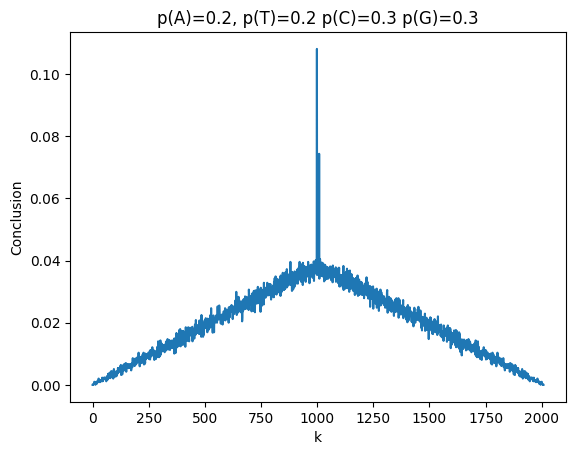

657
10


In [216]:
guid = uuid.uuid4()
x = np.arange(len(conclusion))
plt.plot(x, conclusion)
# plt.text(5, 0.5, f'index={insertion_place}')
# plt.text(7, 0.5, f'guid={guid}')
# plt.annotate(f'insert starts here', xy=(insertion_place, conclusion[insertion_place]), arrowprops=dict(facecolor='red', shrink=0.05))
# plt.annotate(f'instert ends here', xy=(insertion_place + len(inserted_string), conclusion[insertion_place + len(inserted_string)]), arrowprops=dict(facecolor='green', shrink=0.05))
plt.xlabel('k')
plt.ylabel('Conclusion')
plt.title(f'p(A)={alphabet["A"]}, p(T)={alphabet["T"]} p(C)={alphabet["C"]} p(G)={alphabet["G"]}')
plt.show()
print(insertion_place)
print(len(inserted_string))

In [217]:
p_series.to_csv(f"artifacts/{guid}_probability.csv")
np.save(f"artifacts/string_{guid}_{insertion_place}.txt", generated_string)
np.save(f"artifacts/string_inserted_{guid}.txt", inserted_string)